In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

In [3]:
n=0

In [4]:
#compute predicted length distribution and gt length distribution
costs = []
predlen_dist = {}
gtlen_dist = {}
c=0
with open('../eval.DSTC7.static.T5', 'r') as f:
    for query in f:
        n+=1
        query = query.strip()
        query = query.split('\t')
        if(query[-1]=='-'):
            continue
        y = query[1]
        pred = query[2]
        predlen_dist[len(pred)] = predlen_dist.get(len(pred), 0) + 1
        gtlen_dist[len(y)] = gtlen_dist.get(len(y), 0) + 1
        if(abs(float(query[4]) - 0)<1e-6):
            continue
        if(query[2] == ''):
            c+= 1
            print(query)
            continue
        costs.append(float(query[3]) / float(query[4]))

["no it's brand new.  ^", '^. heheeh. har har', '', '33.01753234863281', '3.0']
["no it's brand new.  ^^. heheeh. ", 'har har', '', '16.515722274780273', '3.0']
["no it's brand new.  ^^. heheeh. ", 'har har', '', '9.138349533081055', '3.0']
["no it's brand new.  ^^. heheeh. ", 'har har', '', '29.093055725097656', '3.0']
["no it's brand new.  ^^", '. heheeh. har har', '', '19.046829223632812', '3.0']
['<', 'unconvertable>  ok on desktop upper left side in text go to /system/prefs\'/keyboard leftclick it. <unconvertable>  then go to tab "layouts"', '', '34.358489990234375', '3.0']
['>>', ' how can i manage this ? apt-get install ?', '', '27.623384475708008', '3.0']
['>>', ' how can i manage this ? apt-get install ?', '', '25.357284545898438', '3.0']
['<', 'unconvertable>  i have it, and use it once in a while, what seems to be the issue ?', '', '27.718727111816406', '3.0']
['<', 'unconvertable>  i have it, and use it once in a while, what seems to be the issue ?', '', '24.508655548095703

In [5]:
c/n

0.00033337000403377704

Text(0.5, 1.0, 'cost distribution')

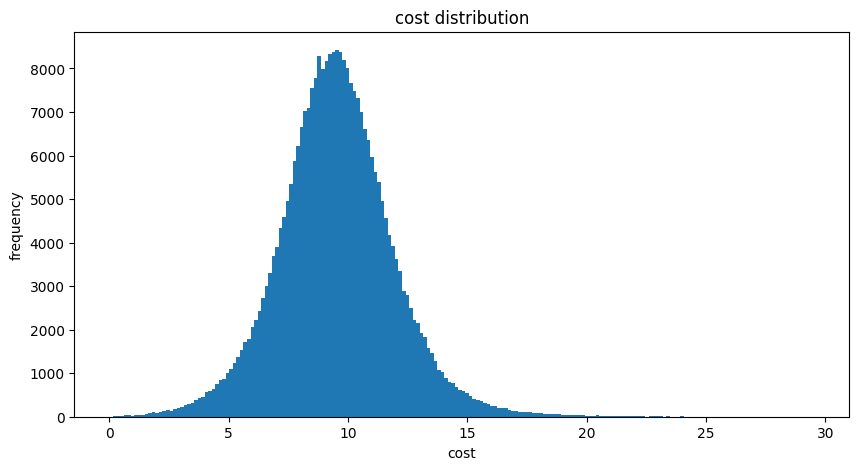

In [6]:
#plot cost distribution using plt
plt.figure(figsize=(10, 5))
plt.hist(costs, bins=200)
plt.xlabel('cost')
plt.ylabel('frequency')
plt.title('cost distribution')

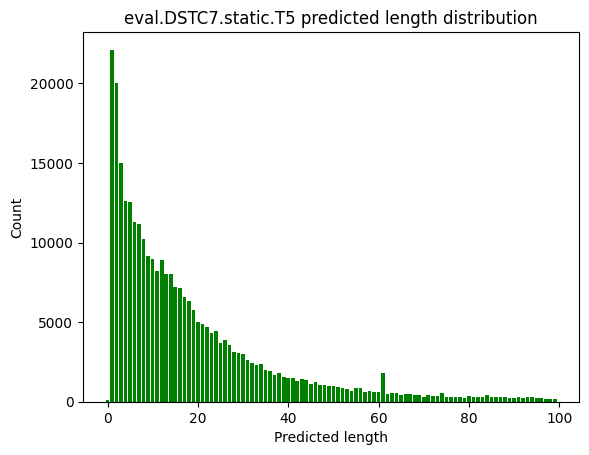

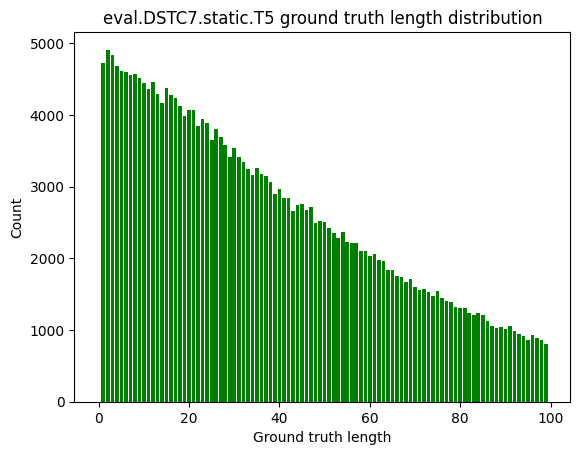

In [7]:
# plt both distributions
x = np.arange(0, 100)
y = []
for i in x:
    y.append(predlen_dist.get(i, 0))
plt.bar(x, y, color='green')
plt.title("eval.DSTC7.static.T5 predicted length distribution")
plt.xlabel("Predicted length")
plt.ylabel("Count")
plt.show()
y = []
for i in x:
    y.append(gtlen_dist.get(i, 0))
plt.bar(x, y, color='green')
plt.title("eval.DSTC7.static.T5 ground truth length distribution")
plt.xlabel("Ground truth length")
plt.ylabel("Count")
plt.show()

In [21]:
df = pd.read_csv("../resultsDSTC7staticT5.csv", sep=";")
# df = df[:-50]

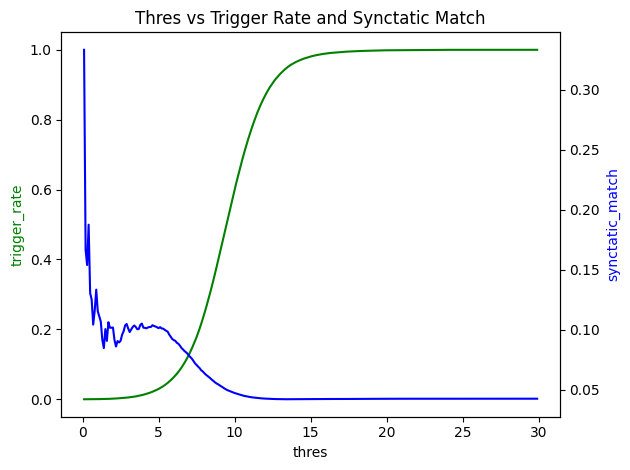

In [22]:
# plot thres vs triger rate and synctatic match using axis twin

fig, ax1 = plt.subplots()
ax2 = ax1.twinx()
ax1.plot(df['thres'], df['trigger_rate'], 'g-')
ax2.plot(df['thres'], df['synctatic_match'], 'b-')
ax1.set_xlabel('thres')
ax1.set_ylabel('trigger_rate', color='g')
ax2.set_ylabel('synctatic_match', color='b')
ax1.set_title('Thres vs Trigger Rate and Synctatic Match')
plt.tight_layout()
plt.show()
